# 1. Information about the submission

## 1.1 Name and number of the assignment 

**Skoltech admission: motivational letters analysis** 

## 1.2 Student name

**Georgy Mkrtchyan** 

## 1.3 Codalab user ID

***Enter here** your Codalab user ID used to submit your run to shared task*

## 1.4 Additional comments

***Enter here** any additional comments which you would like to communicate to a TA who is going to grade this work not related to the content of your submission.*

# 2. Technical Report

*Use Section 2 to describe results of your experiments as you would do writing a paper about your results. DO NOT insert code in this part. Only insert plots and tables summarizing results as needed. Use formulas if needed do described your methodology. The code is provided in Section 3.*

## 2.1 Methodology 

Preprocessed text includes labeled documents from 10 MSc programs of the Skoltech university. 

The dataset was converted into the word embeddings via 3 different approaches : TF-IDF, Doc2vec, BERT sentence tagger

First, step of analysis was assigned to the preprocessing of the data. During this step input (pdf's of motivational letters) were subject to the automated preprocessing and anonimization - exclusion of all personal information via pretrained Stanford CRF sequence models such as phone numbers , emails , names,etc.And also the step inluded aggregation of processed data.


Second, step of the analysis was amed to produce clusterization of the documents. It included unsupervised learning techniques such as K-means,Hierarchical and Affinity propagation clustering.
First two approaches reuqirres predefinition of the number of clusters, thus the optimal number of clusters was chosen on the basis of elbow rule.
![alt text](elbowrule.png "Title")
![alt text](kmeans.png "Title")
![alt text](hc.png "Title")

While, Affinity propagation does not claim for the predefinition of the number of clusters:
![image](affinitypropagation.png "Title")

Also, during the work it was decided to produce the clusterization on the basis on the number of the MSc programs
Last step was assigned for production of the classification of the program based on the embedding representation of the document.


Classification procedure it self was produced on via 2 methods: Random Forest Classificator and fine-tuned sequence-BERT classificator.
- Random Forest Classificator includes averaging of the results of 600 decision trees.
- Sequence-BERT classificator was based on the pretrained "bert-base-uncased" model and then fine-tuned on the available data. The architecture of the NN included 5 epochs each based on the batch size of 16 tokens and the iteration's results were optimized via ADAM optimizerm which is advanced version of the stochastic gradient decent.

## 2.2 Discussion of results

## Clusterization
To begin with, clusterzation of the documents produced not so obvious results.
The optimal number of clusters resulted to be equal to 3 which is not close to the actual number of clusters.However, it was decided to produce clusterzation also by 4-7 clusters to compare the results.
First, of all TF-IDF and BERT embeddings resulted to be less interpretable in terms of clusterization  as resulted centroids were mostly imbalancely distributed with  most of data in some clusters and very sparce left clusters

TF-IDF:
![alt text](kmeans6.png "Title")
![alt text](hc6.png "Title")
BERT:
![alt text](bert67.png "Title")
However, Doc2Vec produced very reliable and interpretable results on both method of clusterization:
![alt text](doc2vecKm.png "Title")
![alt text](doc2vecHC.png "Title")

Moreover,final step of clusterization analysis was dedicated for clusterization by the number of programs, and the results were compared on the basis of Adjusted Rand Index:

K-Means | ARI 
--- | --- 
TF-IDF | 0.00614 
DOC2VEC | 0.32195 
BERT | 0.19273 

Hierarchical  | ARI 
--- | --- 
TF-IDF | 0.07 
DOC2VEC | 0.19719 
BERT | 0.15771 

As we can see, there is only one conclusion can be done - Doc2Vec embeddings on the given dataset outperform ones produced by simple TF-IDF or BERT embeddings.

Talking about Affinity propagation approach, it has withdrawn the worst results among 3 clusterization techniques as the estimated number of clusters for different type of enbeddings fluctuated from 19 to around 50 , which encompasses approximately 15% of the data, i.e. each cluster on average will contain from 15 to 6 observations. Such outcome is useless in terms of clusterization analysis , therefore ,this approach was not used in further comparison


To sum up, obtained results showed that the optimal number of clusters is distributed around the 3-4 which generally, does not coincide with the number of programs. Such a result may described by the fact that some programs has similar prerequisites (*thus similar patterns of the motivational letters*) and low number of observations does not allow to capture slight differences between clusters. 



## Classification

**Produced classification analysis**


Random Forest | F1 | Accuracy  
--- | --- | --- 
TF-IDF | 0.7647 |0.7808
DOC2VEC | 0.549| 0.6027
BERT | 0.5077 |0.589

Results obtained from random forest classification were different to the clusterization analysis in terms of the best embbedings'.
As we can see TF-IDF outperforms both Doc2Vec and BERT embeddings.



*BERT-classificator* 

On the final step of the whole work the classification task was dedicated to the sequence BERT classificator which was fine-tuned on the data. The reulted metrics arose to be not impressive with F1 score of  *0.455* and Accuracy  of *0.3562* 
Generalyy, such a result of course better then a baseline random choice but still loses to the random forest classicator. One of the main reason of such a phenomenon may be the lack of data for the training procedure of the Neural Network.

To sum up, classification of the program on the basis of the motivational letters' embeddings was considered as a sub-problem of the future prediction of the enrollment of the applicant,where some approaches showed acceptable performance, however with increase of the available number of observations the metics will improve.

# 3. Code

## 3.1 Requirements

In [ ]:
pip install csv==1.0
pip install neattext==0.1.2
pip install nltk==3.6.1
pip install numpy==1.19.5
pip install pandas==1.2.4
pip install pycountry==20.7.3
pip install textract
pip install transformers
pip instal torch

In [2]:
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import csv
import os.path
import textract
from csv import writer
import os
import neattext as nt
import re
from neattext.functions import clean_text
from neattext import TextExtractor
import nltk
import pycountry
import numpy as np
import glob
import matplotlib.pyplot as plt
import plotly.express as px
# https://pypi.org/project/neattext/
from bokeh.io import output_notebook
from gensim.models import Word2Vec
import gensim
import gensim.downloader as gensim_api
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import sentence_transformers
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score as ARI
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
import torch
from tqdm.notebook import tqdm
from transformers import BertTokenizer
from torch.utils.data import TensorDataset
from transformers import BertForSequenceClassification
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import AdamW, get_linear_schedule_with_warmup
import random
from sklearn.metrics import classification_report
import bokeh.models as bm, bokeh.plotting as pl

## Supplementary functions

In [3]:
# Install StanfordNERTagger from https://nlp.stanford.edu/software/CRF-NER.html


from nltk.tag.stanford import StanfordNERTagger

def name_extraction_stanford(ml_text):
    names_list=[]
    # path of the installed StanfordNERTagger 
    tagger = StanfordNERTagger('/Users/george/Desktop/stanford-ner-2020-11-17/classifiers/english.all.3class.distsim.crf.ser.gz',
                                  '/Users/george/Desktop/stanford-ner-2020-11-17/stanford-ner.jar') 
    for sent in nltk.sent_tokenize(ml_text):
        tokens = nltk.tokenize.word_tokenize(sent)
        tags = tagger.tag(tokens)
        for tag in tags:
            if tag[1]=='PERSON': 
                names_list.append(tag[0])
    return names_list

## Extract organization
def organization_extraction_stanford(ml_text):
    organization_list=[]
    # path of the installed StanfordNERTagger 
    tagger = StanfordNERTagger('/Users/george/Desktop/stanford-ner-2020-11-17/classifiers/english.all.3class.distsim.crf.ser.gz',
                                  '/Users/george/Desktop/stanford-ner-2020-11-17/stanford-ner.jar') 
    for sent in nltk.sent_tokenize(ml_text):
        tokens = nltk.tokenize.word_tokenize(sent)
        tags = tagger.tag(tokens)
        for tag in tags:
            if tag[1]=='ORGANIZATION': 
                organization_list.append(tag[0])
    return names_list

def append_list_as_row(file_name, list_of_elem):
    # Open file in append mode
    with open(file_name, 'a+', newline='') as write_obj:
        # Create a writer object from csv module
        csv_writer = writer(write_obj)
        # Add contents of list as last row in the csv file
        csv_writer.writerow(list_of_elem)
        
def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

def extract_entity_names(t):
    entity_names = []

    if hasattr(t, 'label') and t.label:
        if t.label() == 'NE':
            entity_names.append(' '.join([child[0] for child in t]))
        else:
            for child in t:
                entity_names.extend(extract_entity_names(child))

    return entity_names

## Extract country
def country_extraction(ml_text):
    country_name=[]
    for country in pycountry.countries:
        if country.name in ml_text:
            country_name.append(country.name)
    if 'Russia'in ml_text:
            country_name.append('Russia')

    return(country_name)

def preprocess(document):
    document = document.lower() # Convert to lowercase
    words = word_tokenize(document) # Tokenize
    words = [w for w in words if not w in stop_words] # Removing stopwords
    # Lemmatizing
    for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:
        words = [wordnet_lemmatizer.lemmatize(x, pos) for x in words]
    return " ".join(words)

def draw_vectors2d(x, y,color,radius, alpha, 
                 width, height,algorithm, show=True, **kwargs):
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x, 'y' : y, 'color': color, **kwargs })

    fig = pl.figure(active_scroll='wheel_zoom',title=f"{algorithm} {len(np.unique(color))}-clusters", width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return

def draw_vectors3d(x, y,z,color, opacity, 
                 width, height,algorithm):
    fig = px.scatter_3d(x=tf_idf_matrix_pca3[:,0], 
                    y=tf_idf_matrix_pca3[:,1], 
                    z=tf_idf_matrix_pca3[:,2],
                    color=color,
                    width=width,
                    height=height,
                    opacity=opacity,
                    title=f'{algorithm} {len(np.unique(color))} clusters')

    fig.show()
    return 


def get_colour(labels):
    colors=[]
    labels=np.array(labels)
    for i in range(0,labels.shape[0]):
        colors.append(random_color[labels[i]])
    return colors

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')



def convert_page_to_list(pdf_path):

    ml_text= textract.process(pdf_path).decode("utf-8") #text obtainment
    # anonimization and removal of extra information
    ml_text=re.sub('[mM]otivational \s?[lL]etter', '', ml_text) 
    ml_text=re.sub("(?P<url>https?://[^\s]+)",'url',ml_text, re.IGNORECASE)
    
    names_to_extract=name_extraction_stanford(ml_text)
    for name in names_to_extract:
        try:
            ml_text=re.sub(name,'',ml_text)
        except:
            pass
    # Extraction of the main information 
    splt_list=ml_text.split('\n\n',maxsplit=-1)
    number_of_lines=[]
    
    for i in range(0,len(splt_list)):
        splt_list[i]=splt_list[i].split(sep='\n', maxsplit=- 1)
        splt_list[i]=' '.join(splt_list[i])
        splt_list[-1]=splt_list[-1].replace('\x0c', "")
    #splt_list=flatten_list(splt_list)
    
    for i in range(0,len(splt_list)):
        splt_list[i]=splt_list[i].split(sep='\n', maxsplit=- 1)
        splt_list[i]=' '.join(splt_list[i])
        splt_list[-1]=splt_list[-1].replace('\x0c', "")
    splt_list=flatten_list(splt_list)
    splt_list[0]=' '.join(splt_list)
    splt_list_new=[]
    splt_list_new.append(splt_list[0])
    
    
    docx = TextExtractor()
    docx.text=splt_list_new[0]
   
    #phone
    
    phone=docx.extract_phone_numbers()
    
    #email
    email=docx.extract_emails() 
    # Extraction of contact information
    if not email:
            splt_list_new.insert(0,'no email')
    else:
            splt_list_new.insert(0,email[0])
    if not phone:
            splt_list_new.insert(0,'no phone')
    else:
            splt_list_new.insert(0,phone[0])
    
            
    splt_list_new = list(filter(None, splt_list_new))
    splt_list_new=splt_list_new[:3]
    
    # Anonimization  
    docx = nt.TextFrame(splt_list_new[2])
    splt_list_new[2]=str(docx.remove_phone_numbers().remove_emails())
    splt_list_new.insert(2,pdf_path)
    # appending of the motivational letter to csv file
    
    append_list_as_row('motivation letters.csv', splt_list_new)        
    
    return splt_list_new

## 3.2 Convert PDF data to CSV data   

In [ ]:
if not os.path.exists("motivational letters.csv"):
    list_of_content=['Phone','Email','Root to the file','Text of motivational letter']
    with open('motivation letters.csv', 'w') as write_obj:
            # Create a writer object from csv module
            csv_writer = writer(write_obj)
            # Add contents of list as last row in the csv file
            csv_writer.writerow(list_of_content)





for root, dirs, files in os.walk("./Motivation letters"):
        for file in files:
            try:
                filename = os.fsdecode(file)
                if filename.endswith(".pdf"):
                    convert_page_to_list(os.path.join(root, file))
            except Exception as e:
                print(e)
                print(os.path.join(root, file))

## 3.3 Preprocessing 

In [4]:
output_notebook()
data=pd.read_csv('motivation letters.csv')

nltk.download('wordnet')
nltk.download('stopwords')

wordnet_lemmatizer = WordNetLemmatizer()
#tokenizer = RegexpTokenizer(r'[a-z]+') 
stop_words = set(stopwords.words('english'))

data["preprocessed text"] = ""
for i in range(0,data.shape[0]):
    data['Text'][i]=re.sub('\r',' ',data['Text'][i])
    data.loc[i,"preprocessed text"]=preprocess(data.loc[i,'Text'])

data['Year']=0
data['program']=0
for i in range(0,data.shape[0]):
    data['Year'][i]=data['Path'][i].split('/')[2]
    data['program'][i]=data['Path'][i].split('/')[3]

possible_labels=np.unique(data.program)
label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict
data['label'] = data.program.replace(label_dict)

Loading BokehJS ...

[nltk_data] Downloading package wordnet to /Users/george/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/george/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-4-131acb001341>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'][i]=data['Path'][i].split('/')[2]
<ipython-input-4-131acb001341>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['program'][i]=data['Path'][i].split('/')[3]
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A val

# 4 - Creation of word embeddings and Clusterization
# 4.1 - TF-IDF

In [5]:
n_program=data.program.nunique()
corpus = data['preprocessed text']
vectorizer = TfidfVectorizer()
tf_idf_matrix = vectorizer.fit_transform(corpus)
tf_idf_matrix=tf_idf_matrix
tf_idf_matrix=np.asarray(tf_idf_matrix.todense())
scaler = MinMaxScaler()
tf_idf_matrix_scaled = scaler.fit_transform(tf_idf_matrix)
colordict = {'SES':'lime','MS':'orange','PQM':'deeppink',
             'AMT': 'black','LS':'darkorchid','IST':'blue',
             'ES': 'green','PE':'peru','MTP':'grey','DS': 'red'}
random_color=list(colordict.values())



## 2D representation

In [6]:
pca_2 = PCA(n_components=2)
tf_idf_matrix_pca=pca_2.fit_transform(tf_idf_matrix_scaled)

draw_vectors2d(tf_idf_matrix_pca[:,0], tf_idf_matrix_pca[:,1],
             color=get_colour(data['label']),radius=8, alpha=0.5, 
                 width=600, height=400,algorithm='Number of programs',token=data['program'])

## K-means

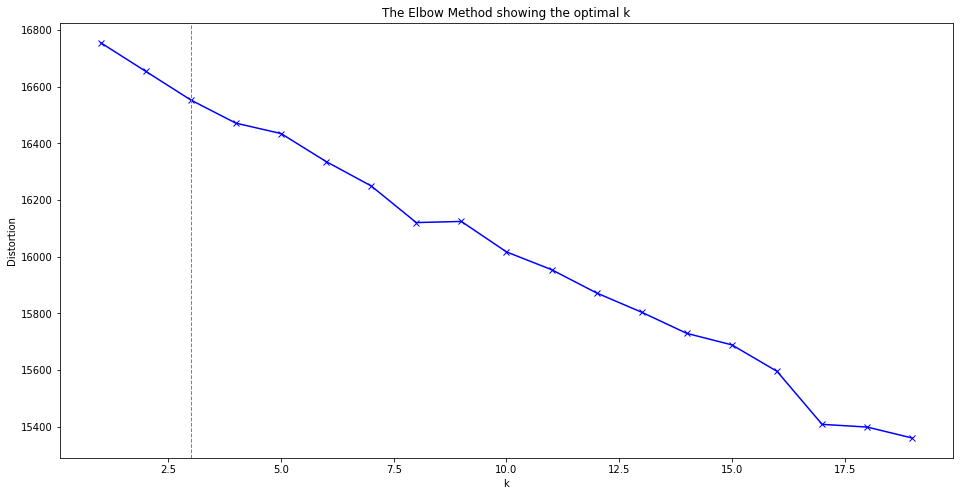

In [7]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(tf_idf_matrix_scaled)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.axvline(3,linestyle='--',c='grey',linewidth=1)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [8]:
for i in range(3,8):
    k_means3 = KMeans(n_clusters=i)  
    k_means3_labels=k_means3.fit_predict(tf_idf_matrix_scaled)
    draw_vectors2d(tf_idf_matrix_pca[:,0], tf_idf_matrix_pca[:,1],
             color=get_colour(k_means3_labels),radius=8, alpha=0.5, 
                 width=400, height=300,algorithm='K-means TF-IDF',
                 token=data['program'])

In [9]:
## clusterization by number of programs
k_means = KMeans(n_clusters=n_program)  
k_means_labels=k_means3.fit_predict(tf_idf_matrix_scaled)
    
draw_vectors2d(tf_idf_matrix_pca[:,0], tf_idf_matrix_pca[:,1],
             color=get_colour(k_means_labels),radius=8, alpha=0.5, 
                 width=400, height=300,algorithm='K-means',
             token=data['program'])

## Hierarchical clustering

In [ ]:
plt.figure(figsize=(20, 14))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(tf_idf_matrix_scaled, method='ward'))
plt.axhline(14.5,linestyle='--',c='grey',linewidth=1.5)# 3 clusters
plt.axhline(14.2,linestyle='--',c='grey',linewidth=1.5)# 5 clusters
plt.show()

In [10]:
for i in range(3,8):
    hier_cluster3 = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')  
    hier_cluster3_labels=hier_cluster3.fit_predict(tf_idf_matrix_scaled)
    draw_vectors2d(tf_idf_matrix_pca[:,0], tf_idf_matrix_pca[:,1],
             color=get_colour(hier_cluster3_labels),radius=8, alpha=0.5, 
                 width=400, height=300,algorithm='Hierarchical clustering',
                 token=data['program'])

In [11]:
## clusterization by number of programs
hier_cluster3 = AgglomerativeClustering(n_clusters=n_program, affinity='euclidean', linkage='ward')  
hier_cluster3_labels=hier_cluster3.fit_predict(tf_idf_matrix_scaled)
draw_vectors2d(tf_idf_matrix_pca[:,0], tf_idf_matrix_pca[:,1],
             color=get_colour(hier_cluster3_labels),radius=8, alpha=0.5, 
                 width=400, height=300,algorithm='Hierarchical clustering',
             token=data['program'])

## AffinityPropagation

Converged after 15 iterations.


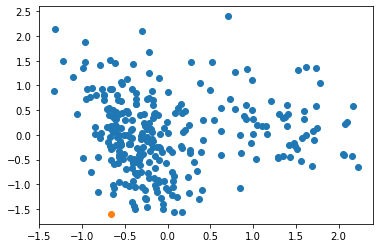

Number of clusters is 2


In [30]:
model_AP=AffinityPropagation(damping=0.8,random_state=42,max_iter=5000,
                             verbose=True).fit(tf_idf_matrix_scaled)
yhat = model_AP.predict(tf_idf_matrix_scaled)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(tf_idf_matrix_pca[row_ix, 0], tf_idf_matrix_pca[row_ix, 1])
    # show the plot
plt.show()
print('Number of clusters is '+str(len(clusters)))

## 3D representation

In [13]:
pca_3 = PCA(n_components=3)
tf_idf_matrix_pca3=pca_3.fit_transform(tf_idf_matrix_scaled)

## K-means

In [78]:
for i in range(3,6):
    
    k_means_3_3 = KMeans(n_clusters=i)  
    k_means_3_3_labels=k_means_3_3.fit_predict(tf_idf_matrix_scaled)
    draw_vectors3d(tf_idf_matrix_pca3[:,0],tf_idf_matrix_pca3[:,1],
                   tf_idf_matrix_pca3[:,2],get_colour(k_means_3_3_labels),
                   opacity=0.7, width=500, height=500,algorithm='KMeans')
    

In [16]:
#clusterization by the number of programs
k_means_3_3 = KMeans(n_clusters=n_program)  
k_means_3_3_labels=k_means_3_3.fit_predict(tf_idf_matrix_scaled)

draw_vectors3d(tf_idf_matrix_pca3[:,0],tf_idf_matrix_pca3[:,1],
                   tf_idf_matrix_pca3[:,2],get_colour(k_means_3_3_labels),
                   opacity=0.7, width=500, height=500,algorithm='Number of progrmas')

## Hierarchical clustering

In [17]:

for i in range(3,6):
    hier_cluster3_3 = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')  
    hier_cluster3_3_labels=hier_cluster3_3.fit_predict(tf_idf_matrix_scaled)

    draw_vectors3d(tf_idf_matrix_pca3[:,0],tf_idf_matrix_pca3[:,1],
                   tf_idf_matrix_pca3[:,2],get_colour(hier_cluster3_3_labels),
                   opacity=0.7, width=500, height=500,
                   algorithm='Hierarchical clustering')

In [18]:
#clusterization by the number of programs
hier_cluster3_3 = AgglomerativeClustering(n_clusters=n_program, affinity='euclidean', linkage='ward')  
hier_cluster3_3_labels=hier_cluster3_3.fit_predict(tf_idf_matrix_scaled)

fig = plt.figure()
draw_vectors3d(tf_idf_matrix_pca3[:,0],tf_idf_matrix_pca3[:,1],
                   tf_idf_matrix_pca3[:,2],get_colour(hier_cluster3_3_labels),
                   opacity=0.7, width=500, height=500,
                   algorithm='Hierarchical clustering:clusterization by the number of programs')




<Figure size 432x288 with 0 Axes>

## AffinityPropagation

Converged after 15 iterations.


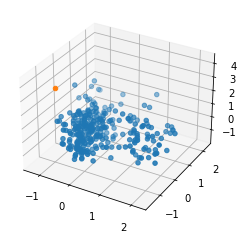

Number of clusters is 2


In [29]:
model_AP_3=AffinityPropagation(damping=0.85,random_state=42,max_iter=5000,
                             verbose=True).fit(tf_idf_matrix_scaled)
yhat3 = model_AP_3.predict(tf_idf_matrix_scaled)
# retrieve unique clusters
clusters = np.unique(yhat3)
# create scatter plot for samples from each cluster
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat3 == cluster)
    # create scatter of these samples
    ax.scatter(tf_idf_matrix_pca3[row_ix, 0],
                tf_idf_matrix_pca3[row_ix, 1],
               tf_idf_matrix_pca3[row_ix, 2])
    # show the plot
plt.show()
print('Number of clusters is '+str(len(clusters)))

# 4.2 - DOC2VEC

In [20]:
prep_text_docs = [TaggedDocument(doc.split(' '), [i]) 
             for i, doc in enumerate(data['preprocessed text'])]
model = Doc2Vec(vector_size=300, min_count=1, epochs = 40,window=4,workers=4)
model.build_vocab(prep_text_docs)
model.train(prep_text_docs, 
                    total_examples=model.corpus_count,
                    epochs=model.epochs)
doc2vec_model = [model.infer_vector((data['preprocessed text'][i].split(' '))) 
            for i in range(0,len(data['preprocessed text']))]

doc2vec_matrix=np.stack( doc2vec_model, axis=0 )

## 2D representation

In [21]:
pca_2= PCA(n_components=2)
doc2vec_matrix_pca=pca_2.fit_transform(scaler.fit_transform(doc2vec_matrix))


In [22]:
draw_vectors2d(doc2vec_matrix_pca[:,0], doc2vec_matrix_pca[:,1],
             color=get_colour(data['label']),radius=8, alpha=0.5, 
                 width=400, height=300,algorithm='Number of programs',token=data['program'])

## K-means

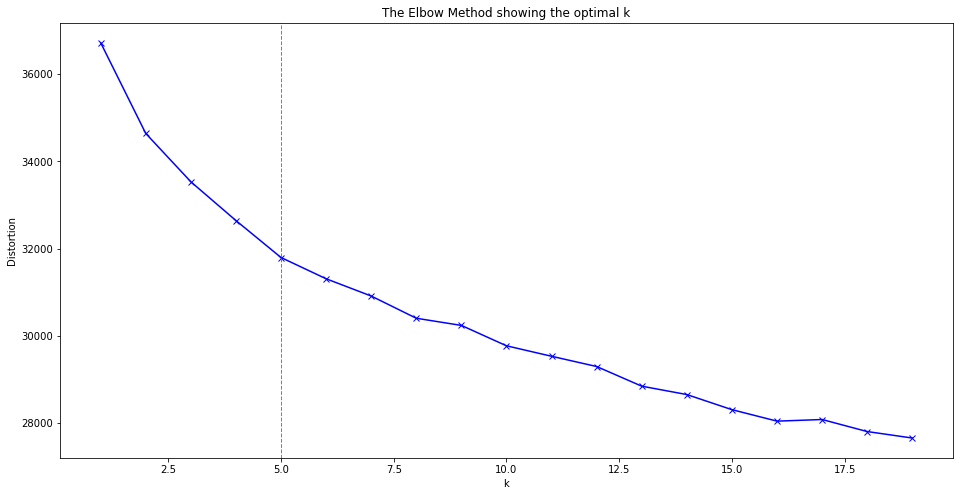

In [23]:
np.random.seed(2)
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(doc2vec_matrix)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.axvline(5,linestyle='--',c='grey',linewidth=1)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [24]:

n_clusters=[3,4,5,6,7]
for i in n_clusters:
    k_means = KMeans(n_clusters=i)  
    k_means.fit_predict(doc2vec_matrix)
    k_means_doc2vec_labels=k_means.fit_predict(doc2vec_matrix)
    draw_vectors2d(doc2vec_matrix_pca[:,0], doc2vec_matrix_pca[:,1],
             color=get_colour(k_means_doc2vec_labels),radius=8, alpha=0.5, 
                 width=400, height=300,algorithm='K-means:Doc2Vec',token=data['program'])




In [25]:
#clusterization by the number of programs

k_means = KMeans(n_clusters=n_program)  
k_means.fit_predict(doc2vec_matrix)
k_means_doc2vec_labels=k_means.fit_predict(doc2vec_matrix)
draw_vectors2d(doc2vec_matrix_pca[:,0], doc2vec_matrix_pca[:,1],
             color=get_colour(k_means_doc2vec_labels),radius=8, alpha=0.5, 
                 width=400, height=300,algorithm='K-means',token=data['program'])

## Hierarchical clustering

In [ ]:
plt.figure(figsize=(20, 14))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(doc2vec_matrix, method='ward'))
plt.axhline(38,linestyle='--',c='grey',linewidth=1)# 4 clusters
plt.axhline(35.5,linestyle='--',c='grey',linewidth=1)# 5 clusters
plt.axhline(33,linestyle='--',c='grey',linewidth=1)# 5 clusters


plt.show()

In [26]:
n_clusters=[3,4,5,6,7]
for i in n_clusters:
    hier_cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')  
    hier_cluster_doc2vec_labels=hier_cluster.fit_predict(doc2vec_matrix)
    draw_vectors2d(doc2vec_matrix_pca[:,0], doc2vec_matrix_pca[:,1],
             color=get_colour(hier_cluster_doc2vec_labels),radius=8, alpha=0.5, 
                 width=400, height=300,algorithm='Hierarchical clustering: Doc2Vec',
                 token=data['program'])

In [27]:
#clusterization by the number of programs
hier_cluster = AgglomerativeClustering(n_clusters=n_program, affinity='euclidean', linkage='ward')  
hier_cluster_doc2vec_labels=hier_cluster.fit_predict(doc2vec_matrix)
draw_vectors2d(doc2vec_matrix_pca[:,0], doc2vec_matrix_pca[:,1],
             color=get_colour(hier_cluster_doc2vec_labels),radius=8, alpha=0.5, 
                 width=400, height=300,algorithm='Number of programs',
               token=data['program'])

## AffinityPropagation

Converged after 81 iterations.


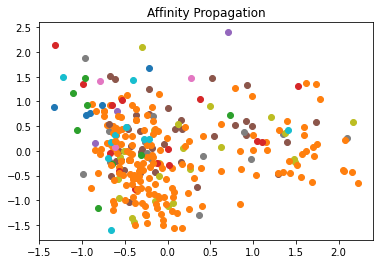

Number of clusters is 34


In [28]:
model_AP=AffinityPropagation(damping=0.9,random_state=42,max_iter=5000,
                             verbose=True).fit(doc2vec_matrix)
yhat = model_AP.predict(doc2vec_matrix)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(tf_idf_matrix_pca[row_ix, 0], tf_idf_matrix_pca[row_ix, 1])
    # show the plot
plt.title('Affinity Propagation')
plt.show()
print('Number of clusters is '+str(len(clusters)))

## 3D representation

In [31]:
pca_3= PCA(n_components=3)
doc2vec_matrix_pca3=pca_3.fit_transform(scaler.fit_transform(doc2vec_matrix))

In [32]:
n_clusters=[3,4,5,6,7]
for i in n_clusters:
    
    k_means_3 = KMeans(n_clusters=i)  
    k_means3_doc2vec_labels=k_means_3.fit_predict(doc2vec_matrix)

    draw_vectors3d(doc2vec_matrix_pca3[:,0],doc2vec_matrix_pca3[:,1],
                   doc2vec_matrix_pca3[:,2],get_colour(k_means3_doc2vec_labels),
                   opacity=0.7, width=500, height=500,
                   algorithm='K-Means')



In [33]:
#clusterization by the number of programs

k_means_3 = KMeans(n_clusters=n_program)  
k_means3_doc2vec_labels=k_means_3.fit_predict(doc2vec_matrix)
fig = plt.figure()
draw_vectors3d(doc2vec_matrix_pca3[:,0],doc2vec_matrix_pca3[:,1],
                   doc2vec_matrix_pca3[:,2],get_colour(k_means3_doc2vec_labels),
                   opacity=0.7, width=500, height=500,
                   algorithm='K-Means:clusterization by the number of programs')



<Figure size 432x288 with 0 Axes>

## Hierarchical clustering

In [34]:
n_clusters=[3,4,5,6,7]
for i in n_clusters:
    
    hier_cluster3 = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')  
    hier_cluster3_doc2vec_label=hier_cluster3.fit_predict(doc2vec_matrix)
    draw_vectors3d(doc2vec_matrix_pca3[:,0],doc2vec_matrix_pca3[:,1],
                   doc2vec_matrix_pca3[:,2],get_colour(hier_cluster3_doc2vec_label),
                   opacity=0.7, width=500, height=500,
                   algorithm='Hierarchical clustering')




In [35]:
#clusterization by the number of programs
hier_cluster3 = AgglomerativeClustering(n_clusters=n_program, affinity='euclidean', linkage='ward')  
hier_cluster3_doc2vec_labels=hier_cluster.fit_predict(doc2vec_matrix)
draw_vectors3d(doc2vec_matrix_pca3[:,0],doc2vec_matrix_pca3[:,1],
                   doc2vec_matrix_pca3[:,2],get_colour(hier_cluster3_doc2vec_labels),
                   opacity=0.7, width=500, height=500,
                   algorithm='Hierarchical clustering:clusterization by the number of programs')

## AffinityPropagation

Converged after 57 iterations.


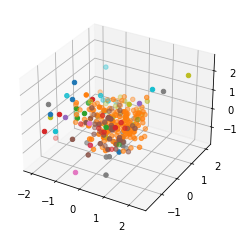

Number of clusters is 34


In [36]:
model_AP_3=AffinityPropagation(damping=0.85,random_state=42,max_iter=5000,
                             verbose=True).fit(doc2vec_matrix)
yhat3 = model_AP_3.predict(doc2vec_matrix)
# retrieve unique clusters
clusters = np.unique(yhat3)
# create scatter plot for samples from each cluster
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat3 == cluster)
    # create scatter of these samples
    ax.scatter(doc2vec_matrix_pca3[row_ix, 0],
                doc2vec_matrix_pca3[row_ix, 1],
               doc2vec_matrix_pca3[row_ix, 2])
    # show the plot
plt.show()
print('Number of clusters is '+str(len(clusters)))

# 4.3 - BERT

In [37]:
embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')
corpus_embeddings=[]
for text in data['preprocessed text']:
    corpus_embeddings.append(embedder.encode(text))
bert_matrix=np.stack( corpus_embeddings, axis=0 )

In [ ]:
## 2D representation

In [38]:
pca_2 = PCA(n_components=2)
bert_matrix_pca=pca_2.fit_transform(scaler.fit_transform(bert_matrix))

draw_vectors2d(bert_matrix_pca[:,0], bert_matrix_pca[:,1],
             color=get_colour(data['label']),radius=8, alpha=0.5, 
                 width=400, height=300,algorithm='Number of programs',
             token=data['program'])

## K-means

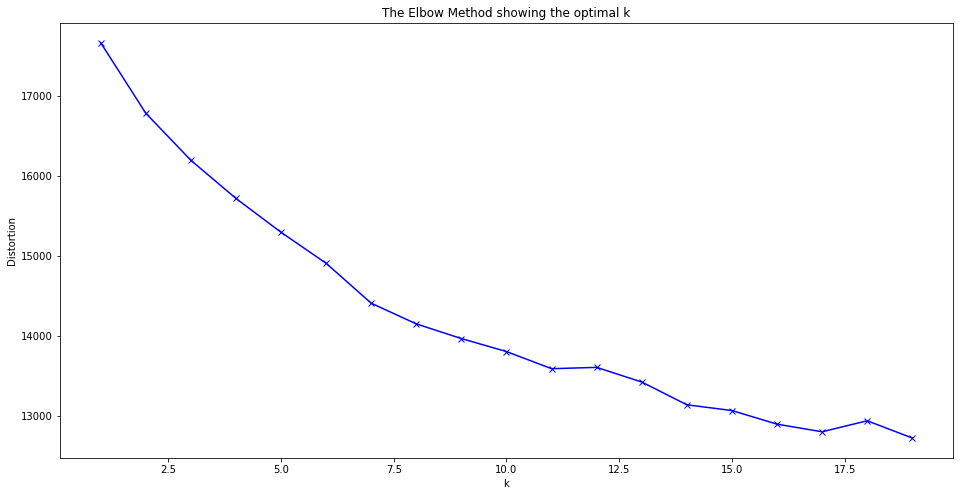

In [39]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(bert_matrix)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [40]:
for i in range(3,10):
    k_means3 = KMeans(n_clusters=i)  
    k_means3_labels=k_means3.fit_predict(bert_matrix)
    
    draw_vectors2d(bert_matrix_pca[:,0], bert_matrix_pca[:,1],
             color=get_colour(k_means3_labels),radius=8, alpha=0.5, 
                 width=400, height=300,algorithm='K-means',
                 token=data['program'])
    

In [41]:
#clusterization by the number of programs
k_means3 = KMeans(n_clusters=n_program)  
k_means3_labels=k_means3.fit_predict(bert_matrix)
draw_vectors2d(bert_matrix_pca[:,0], bert_matrix_pca[:,1],
             color=get_colour(k_means3_labels),radius=8, alpha=0.5, 
                 width=400, height=300,algorithm='K-means',
                 token=data['program'])

## Hierarchical clustering

In [ ]:
plt.figure(figsize=(20, 14))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(bert_matrix, method='ward'))

plt.show()

In [42]:
for i in range(3,10):
    hier_cluster3 = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')  
    hier_cluster3_labels=hier_cluster3.fit_predict(bert_matrix)
    draw_vectors2d(bert_matrix_pca[:,0], bert_matrix_pca[:,1],
             color=get_colour(hier_cluster3_labels),radius=8, alpha=0.5, 
                 width=400, height=300,algorithm='Hierarchical Clustering: BERT',
                 token=data['program'])

In [43]:
#clusterization by the number of programs

hier_cluster3 = AgglomerativeClustering(n_clusters=n_program, affinity='euclidean', linkage='ward')  
hier_cluster3_labels=hier_cluster3.fit_predict(bert_matrix)
draw_vectors2d(bert_matrix_pca[:,0], bert_matrix_pca[:,1],
             color=get_colour(hier_cluster3_labels),radius=8, alpha=0.5, 
                 width=400, height=300,algorithm='Hierarchical Clustering',
                 token=data['program'])

## AffinityPropagation

Converged after 38 iterations.


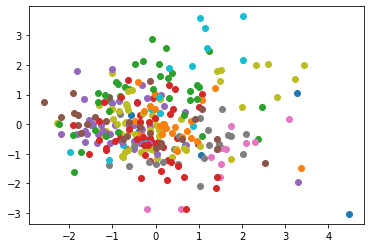

Number of clusters is 26


In [44]:
model_AP=AffinityPropagation(damping=0.8,random_state=42,max_iter=5000,
                             verbose=True).fit(bert_matrix)
yhat = model_AP.predict(bert_matrix)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(bert_matrix_pca[row_ix, 0], bert_matrix_pca[row_ix, 1])
    # show the plot
plt.show()
print('Number of clusters is '+str(len(clusters)))

## 3D representation

In [45]:
pca_3 = PCA(n_components=3)
bert_matrix_pca3=pca_3.fit_transform(scaler.fit_transform(bert_matrix))

In [46]:
for i in range(3,10):
    
    k_means_3_3 = KMeans(n_clusters=i)  
    k_means_3_3_labels=k_means_3_3.fit_predict(bert_matrix)

    draw_vectors3d(bert_matrix_pca3[:,0],bert_matrix_pca3[:,1],
                   bert_matrix_pca3[:,2],get_colour(k_means_3_3_labels),
                   opacity=0.7, width=500, height=500,
                   algorithm='K-means')

In [47]:
#clusterization by the number of programs

k_means_3_3 = KMeans(n_clusters=n_program)  
k_means_3_3_labels=k_means_3_3.fit_predict(bert_matrix)

draw_vectors3d(bert_matrix_pca3[:,0],bert_matrix_pca3[:,1],
                   bert_matrix_pca3[:,2],get_colour(k_means_3_3_labels),
                   opacity=0.7, width=500, height=500,
                   algorithm='K-means:clusterization by the number of programs')

## Hierarchical clustering

In [48]:
for i in range(3,10):
    hier_cluster3_3 = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')  
    hier_cluster3_3_labels=hier_cluster3_3.fit_predict(bert_matrix)

    draw_vectors3d(bert_matrix_pca3[:,0],bert_matrix_pca3[:,1],
                   bert_matrix_pca3[:,2],get_colour(hier_cluster3_3_labels),
                   opacity=0.7, width=500, height=500,
                   algorithm='Hierarchical clustering')



In [49]:
#clusterization by the number of programs

hier_cluster3_3 = AgglomerativeClustering(n_clusters=n_program, affinity='euclidean', linkage='ward')  
hier_cluster3_3_labels=hier_cluster3_3.fit_predict(bert_matrix)

draw_vectors3d(bert_matrix_pca3[:,0],bert_matrix_pca3[:,1],
                   bert_matrix_pca3[:,2],get_colour(hier_cluster3_3_labels),
                   opacity=0.7, width=500, height=500,
                   algorithm='Hierarchical clustering:clusterization by the number of programs')



## AffinityPropagation

Converged after 47 iterations.


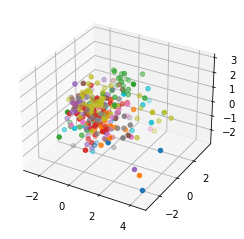

Number of clusters is 26


In [50]:
model_AP_3=AffinityPropagation(damping=0.85,random_state=42,max_iter=5000,
                             verbose=True).fit(bert_matrix)
yhat3 = model_AP_3.predict(bert_matrix)
# retrieve unique clusters
clusters = np.unique(yhat3)
# create scatter plot for samples from each cluster
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat3 == cluster)
    # create scatter of these samples
    ax.scatter(bert_matrix_pca3[row_ix, 0],
                bert_matrix_pca3[row_ix, 1],
               bert_matrix_pca3[row_ix, 2])
    # show the plot
plt.show()
print('Number of clusters is '+str(len(clusters)))

# 4.4 ARI comparison 
ARI: corrected-for-chance measure of the similarity between two data clusterings.

In [51]:
#k-means
k_means_programs = KMeans(n_clusters=n_program) 

#TF-IDF based
k_m_programs_labels_tfidf=k_means_programs.fit_predict(tf_idf_matrix_scaled)

#Doc2Vec
k_m_programs_labels_doc2vec=k_means_programs.fit_predict(doc2vec_matrix)

#BERT based - distilbert
k_m_programs_labels_bert=k_means_programs.fit_predict(bert_matrix)



# hierachical clustering
hc_programs= AgglomerativeClustering(n_clusters=n_program,
                                     affinity='euclidean', linkage='ward')  

#TF-IDF based
hc_labels_tfidf=hc_programs.fit_predict(tf_idf_matrix_scaled)


#Doc2Vec
hc_labels_doc2vec=hc_programs.fit_predict(doc2vec_matrix)


#BERT based - distilbert
bert_matrix


hc_labels_bert=hc_programs.fit_predict(bert_matrix)

In [52]:
km_tfidf_ARI=ARI(data.label,k_m_programs_labels_tfidf)
km_doc2vec_ARI=ARI(data.label,k_m_programs_labels_doc2vec)
km_bert_ARI=ARI(data.label,k_m_programs_labels_bert)

hc_tfidf_ARI=ARI(data.label,hc_labels_tfidf)
hc_doc2vec_ARI=ARI(data.label,hc_labels_doc2vec)
hc_bert_ARI=ARI(data.label,hc_labels_bert)

print("ARI for the K-means TF-IDF is " + str(np.round(km_tfidf_ARI,5)))
print("ARI for the K-means Doc2Vec is " + str(np.round(km_doc2vec_ARI,5)))
print("ARI for the K-means BERT is " + str(np.round(km_bert_ARI,5)))

print("ARI for the Hierarchical Clustering TF-IDF is " + str(np.round(hc_tfidf_ARI,5)))
print("ARI for the Hierarchical Clustering Doc2Vec is " + str(np.round(hc_doc2vec_ARI,5)))
print("ARI for the Hierarchical Clustering BERT is "  + str(np.round(hc_bert_ARI,5)))

ARI for the K-means TF-IDF is -0.00614
ARI for the K-means Doc2Vec is 0.22781
ARI for the K-means BERT is 0.19273
ARI for the Hierarchical Clustering TF-IDF is 0.07
ARI for the Hierarchical Clustering Doc2Vec is 0.26857
ARI for the Hierarchical Clustering BERT is 0.15771


In [53]:
data['bert']=0
data['bert'] = data['bert'].astype('object')
for i in range(0,bert_matrix.shape[0]):
    data.at[i, 'bert'] = list(bert_matrix[i])
    
data['doc2vec']=0
data['doc2vec'] = data['doc2vec'].astype('object')
for i in range(0,doc2vec_matrix.shape[0]):
    data.at[i, 'doc2vec'] = list(doc2vec_matrix[i])
    
data['tf_idf']=0
data['tf_idf'] = data['tf_idf'].astype('object')
for i in range(0,tf_idf_matrix_scaled.shape[0]):
    data.at[i, 'tf_idf'] = list(tf_idf_matrix_scaled[i])

# 5 - Program classification

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data.index.values, 
                                                  data.label.values, 
                                                  test_size=0.25, 
                                                  random_state=42, 
                                                  stratify=data.label.values)

data['data_type'] = ['not_set']*data.shape[0]

data.loc[X_train, 'data_type'] = 'train'
data.loc[X_test, 'data_type'] = 'test'

# 5.1 Random Forest

In [55]:
doc2_vec_train=data.loc[X_train,'doc2vec']
doc2_vec_test=data.loc[X_test,'doc2vec']
tfidf_train=data.loc[X_train,'tf_idf']
tfidf_test=data.loc[X_test,'tf_idf']
bert_train=data.loc[X_train,'bert']
bert_test=data.loc[X_test,'bert']

In [56]:
doc2vec_train = np.asarray([list(map(float, item)) for item in doc2_vec_train])
doc2vec_test = np.asarray([list(map(float, item)) for item in doc2_vec_test])
tfidf_train = np.asarray([list(map(float, item)) for item in tfidf_train])
tfidf_test = np.asarray([list(map(float, item)) for item in tfidf_test])
bert_train = np.asarray([list(map(float, item)) for item in bert_train])
bert_test = np.asarray([list(map(float, item)) for item in bert_test])

## TF-IDF

In [60]:
rf_class=RandomForestClassifier(n_estimators=600,n_jobs=-1, random_state=12)

rf_class_tf_idf=rf_class.fit(tfidf_train, Y_train)
rf_class_tf_idf_pred=rf_class.predict(tfidf_test)
conf_m_tfidf=pd.DataFrame(confusion_matrix(Y_test,rf_class_tf_idf_pred))
conf_m_tfidf.columns=list(data['program'].unique())
conf_m_tfidf.index=list(data['program'].unique())
print('TF_IDF accuracy on random forest is : '+ str(accuracy_score(Y_test,rf_class_tf_idf_pred)))
print('TF_IDF f1 score on random forest is : '+ str(f1_score(Y_test,rf_class_tf_idf_pred,average='weighted')))
print('TF_IDF confusion matrix is:')
print(conf_m_tfidf)

TF_IDF accuracy on random forest is : 0.6575342465753424
TF_IDF f1 score on random forest is : 0.610840014308861
TF_IDF confusion matrix is:
     SES  MS  PQM  AMT  LS  IST  ES  PE  MTP  DS
SES    1   4    0    0   0    0   0   0    0   0
MS     0  20    0    0   0    0   0   0    0   0
PQM    0   0    4    0   0    0   0   0    0   0
AMT    0   6    0    3   0    0   0   0    0   0
LS     0   1    0    0   9    0   0   0    0   0
IST    0   2    0    0   1    0   0   0    1   0
ES     0   3    0    0   0    0   0   0    0   0
PE     0   2    0    0   0    0   0   3    0   0
MTP    0   0    0    0   1    0   0   0    5   0
DS     0   4    0    0   0    0   0   0    0   3


## DOC2VEC

In [61]:
rf_class_doc2vec=rf_class.fit(doc2vec_train, Y_train)
rf_class_doc2vec_pred=rf_class.predict(doc2vec_test)
conf_m_doc2vec=pd.DataFrame(confusion_matrix(Y_test,rf_class_doc2vec_pred))
conf_m_doc2vec.columns=list(data['program'].unique())
conf_m_doc2vec.index=list(data['program'].unique())
print('Doc2Vec accuracy on random forest is : '+ str(accuracy_score(Y_test,rf_class_doc2vec_pred)))
print('Doc2Vec f1 score on random forest is : '+ str(f1_score(Y_test,rf_class_doc2vec_pred,average='weighted')))
print('Doc2Vec confusion matrix is:')
print(conf_m_doc2vec)

Doc2Vec accuracy on random forest is : 0.6301369863013698
Doc2Vec f1 score on random forest is : 0.5972988199015596
Doc2Vec confusion matrix is:
     SES  MS  PQM  AMT  LS  IST  ES  PE  MTP  DS
SES    0   3    0    0   0    1   0   0    0   1
MS     0  20    0    0   0    0   0   0    0   0
PQM    0   1    3    0   0    0   0   0    0   0
AMT    0   6    0    3   0    0   0   0    0   0
LS     0   1    0    0   9    0   0   0    0   0
IST    0   2    0    0   0    1   0   0    1   0
ES     0   1    0    0   0    0   1   0    1   0
PE     0   1    0    0   0    1   0   3    0   0
MTP    0   1    0    0   1    1   0   0    3   0
DS     0   4    0    0   0    0   0   0    0   3


## BERT

In [62]:
rf_class_bert=rf_class.fit(bert_train, Y_train)
rf_class_bert_pred=rf_class.predict(bert_test)
conf_m_bert=pd.DataFrame(confusion_matrix(Y_test,rf_class_bert_pred))
conf_m_bert.columns=list(data['program'].unique())
conf_m_bert.index=list(data['program'].unique())
print('BERT accuracy on random forest is : '+ str(accuracy_score(Y_test,rf_class_bert_pred)))
print('BERT f1 score on random forest is : '+ str(f1_score(Y_test,rf_class_bert_pred,average='weighted')))
print('BERT confusion matrix is:')
print(conf_m_bert)

BERT accuracy on random forest is : 0.5342465753424658
BERT f1 score on random forest is : 0.44648918097749696
BERT confusion matrix is:
     SES  MS  PQM  AMT  LS  IST  ES  PE  MTP  DS
SES    1   2    0    1   1    0   0   0    0   0
MS     0  20    0    0   0    0   0   0    0   0
PQM    0   3    0    0   0    0   0   1    0   0
AMT    0   9    0    0   0    0   0   0    0   0
LS     0   1    0    0   9    0   0   0    0   0
IST    0   2    1    0   0    0   0   0    1   0
ES     0   3    0    0   0    0   0   0    0   0
PE     0   0    0    0   1    0   0   4    0   0
MTP    0   5    0    0   0    0   0   0    1   0
DS     0   3    0    0   0    0   0   0    0   4


# 5.2 Sequence-BERT Classificator

In [63]:
df=data[['Text','program']]
df['label'] = df.program.replace(label_dict)
X_train, X_val, y_train, y_val = train_test_split(df.index.values, 
                                                  df.label.values, 
                                                  test_size=0.25, 
                                                  random_state=1, 
                                                  stratify=df.label.values)

df['data_type'] = ['not_set']*df.shape[0]

df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

<ipython-input-63-2001ec4fca9c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-63-2001ec4fca9c>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [64]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)
                                          
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].Text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type=='val'].Text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type=='val'].label.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/opt/anaconda3/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2212: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



In [66]:
# Setup
bert_model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

batch_size = 16

dataloader_train = DataLoader(dataset_train,
                              batch_size=batch_size,shuffle=True)

dataloader_validation = DataLoader(dataset_val,  
                                   batch_size=batch_size,shuffle=True)

optimizer = AdamW(bert_model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)
                  
epochs = 5

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [68]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [70]:
seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

def evaluate(dataloader_val):

    bert_model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }
        print(inputs['labels'])
        with torch.no_grad():        
            outputs = bert_model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals
    



## Model fine-tuning

In [ ]:
for epoch in tqdm(range(1, epochs+1)):
    
    bert_model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        bert_model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       
        print(inputs['labels'])
        
        outputs = bert_model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(bert_model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(bert_model.state_dict(), f'finetuned_BERT_epoch_{epoch}.bert_model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')




In [75]:

bert_model.to(device)

bert_model.load_state_dict(torch.load('finetuned_BERT_epoch_5.bert_model', map_location=torch.device('cpu')))

_, predictions, true_vals = evaluate(dataloader_validation)
accuracy_per_class(predictions, true_vals)

tensor([3, 8, 1, 3, 9, 7, 3, 7, 2, 6, 1, 0, 4, 0, 1, 1])
tensor([1, 2, 4, 5, 5, 1, 9, 3, 9, 4, 0, 1, 1, 1, 4, 5])
tensor([1, 4, 8, 3, 4, 1, 8, 1, 2, 3, 9, 4, 1, 4, 1, 0])
tensor([5, 4, 8, 7, 1, 9, 0, 6, 8, 3, 3, 3, 9, 6, 2, 9])
tensor([1, 8, 1, 4, 7, 7, 1, 1, 1])
Class: AMT
Accuracy: 0/5

Class: DS
Accuracy: 0/20

Class: ES
Accuracy: 0/4

Class: IST
Accuracy: 0/9

Class: LS
Accuracy: 7/10

Class: MS
Accuracy: 0/4

Class: MTP
Accuracy: 0/3

Class: PE
Accuracy: 0/5

Class: PQM
Accuracy: 0/6

Class: SES
Accuracy: 1/7



In [76]:
preds_flat = np.argmax(predictions, axis=1).flatten()
print(classification_report(true_vals,preds_flat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         9
           4       1.00      0.70      0.82        10
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         6
           9       0.02      0.14      0.03         7

    accuracy                           0.11        73
   macro avg       0.10      0.08      0.09        73
weighted avg       0.14      0.11      0.12        73



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

